# Applying the gluing method to R(K4,K6-e)

General procedure: Pick some K shared neighborhood. In our case, this just involves choosing a value for d. Then, iterate through all graphs in R(K3,K6-e,16). For each graph, iterate through each vertex and check if a pointed graph can be constructed. Do this again to pick 2 pointed graphs. At this point, attempt to glue the graphs. From the paper: 
> Note that this consisted of one gluing problem for each
automorphism of K.

In our case, this means considering all d! ways to map an instance of K in the first pointed graph to an instance of K in the second graph.
Repeat for 15, 14, 13, and 12 vertex graphs in R(K3, K6-e). 

Note that for 16 vertices, d >= 5. For 15, d >=4, etc.

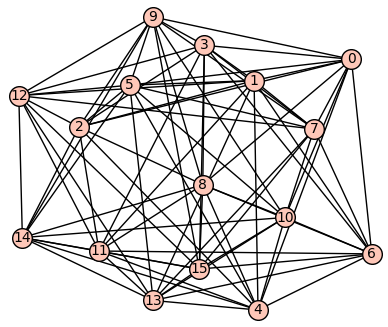

In [20]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_16.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    #lets try d = 5
    for i in graphs:
        G = Graph() # Create an empty graph
        from_graph6(G, i)
        G.show()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
    #nothing

So, it turns out 16 vertex graphs don't have any 5-independent sets, so no K can be found. We move onto 15 vertex graphs

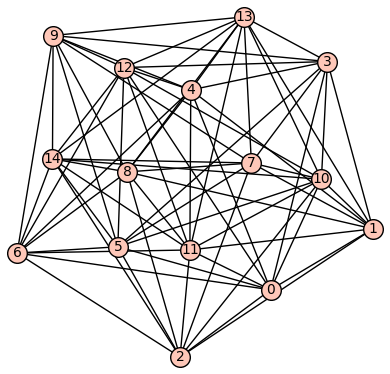

In [21]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_15.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    #lets try d = 5
    for i in graphs:
        G = Graph() # Create an empty graph
        from_graph6(G, i)
        G.show()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(vertex, possible_K)

It turns out there are no pointed graphs for d=4 and d=5 for 15 vertices. We try with 14 vertices.

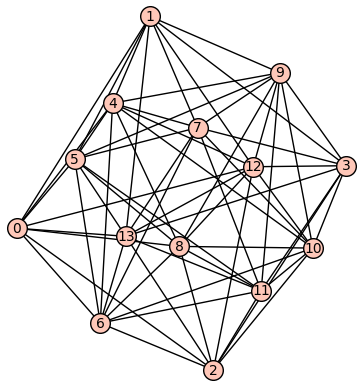

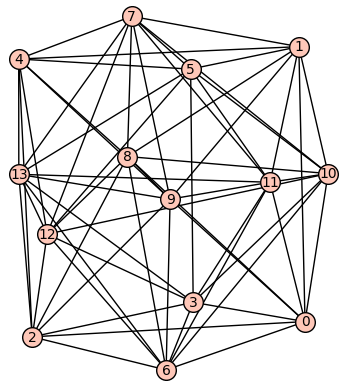

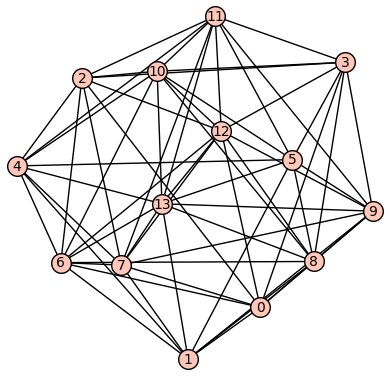

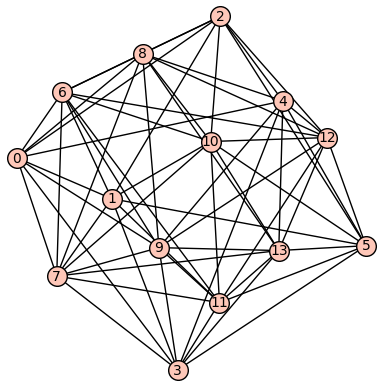

In [22]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_14.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in graphs:
        G = Graph() # Create an empty graph
        from_graph6(G, i)
        G.show()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(vertex, possible_K)


There are no pointed graphs for d=3, d=4, and d=5 for 14 vertices. We can try for 13 vertices.

In [23]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_13.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in graphs:
        G = Graph() # Create an empty graph
        from_graph6(G, i)
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 2 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(vertex, possible_K)


No pointed graphs for d=2, d=3, d=4, and d=5 for 13 vertices. We can try for 12 vertices.

In [24]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_12.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in graphs:
        G = Graph() # Create an empty graph
        from_graph6(G, i)
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 1 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 2 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(vertex, possible_K)

In all cases, no pointed graphs were made